# Fitting a helix

### Imports

In [1]:
import time
import numpy as np
import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sess = tf.InteractiveSession()

### Generate helix sampling with random noise
<p>Equation of a helix:</p>
<p><i>x = r * cos(t)</i></p>
<p><i>y = r * sin(t)</i></p>
<p><i>z = a * t</i></p>
<p><i>r</i>  describes radius of helix, <i>a</i>  describes vertical separations of loops. These are the parameters we will be predicting.</p>

In [2]:
# sample a line from 0 to 100 with given samples
# parameter t for parametric eqn
num_samples = 300
t0 = np.linspace(0, 100, num=num_samples)
# Add gaussian noise with mean 0, std_dev 0.2
t0 += np.random.normal(0, 0.1, num_samples)

# parametric fxns
r0 = np.random.rand() * 10 + 10
a0 = np.random.rand() * 3 + 3
x = r0 * np.cos(t0) + np.random.randn(len(t0))
y = r0 * np.sin(t0) + np.random.randn(len(t0))
z = a0 * t0         + np.random.randn(len(t0))

### Graphing helper methods

In [3]:
def double_plot(x, y, z):
    # figaspect: height to width ratio
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.scatter(x, y, z)
    z_lim = abs(max(z) - min(z)) / 5
    ax1.set_zlim(0, z_lim)

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot(x, y, z)
    ax2.set_zlim(0, z_lim)

    plt.show()

In [4]:
def fit_plot(x, y, z, xp, yp, zp):
    # figaspect: height to width ratio
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.scatter(x, y, z)
    z_lim = abs(max(z) - min(z)) / 5
    ax1.set_zlim(0, z_lim)

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.scatter(x, y, z)
    ax2.plot(xp, yp, zp)
    ax2.set_zlim(0, z_lim)

    plt.show()

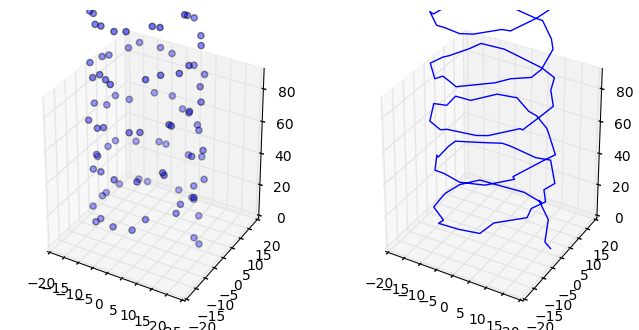

In [5]:
double_plot(x, y, z)

### Hyperparameters

In [6]:
LEARN_RATE = 0.000001
EPOCHS = 200

### Construct parameters, cost, training ops

In [7]:
# parameter
t = tf.placeholder(tf.float32, shape=(1, num_samples), name="t_param")

# squeeze() - transforms from 2d row vector (1, num_samples) to 1d row vector (num_samples)
sint = tf.sin(tf.squeeze(t))
cost = tf.cos(tf.squeeze(t))
rowt = tf.squeeze(t)
param_terms = tf.transpose(
    tf.stack([sint, cost, rowt], axis=0, name="parametric_t_terms"))
##tr = tf.reshape(t, (1, num_samples), name="reshape_t")

# truncated_normal: normal distribution, no values past 2sigma
##weights = tf.truncated_normal([num_samples, 3], name="weights") / np.sqrt(num_samples)
weights = tf.Variable(tf.zeros((num_samples, 3), dtype=tf.float32), dtype=tf.float32, name="weights")

# predicted values
pred_coeffs = tf.matmul(t, weights)
pred = tf.multiply(pred_coeffs, param_terms)

# expected/true r and a values
exp_coeffs = tf.constant([r0, r0, a0], name="expected_coefficients")
# expected values
exp = tf.multiply(exp_coeffs, param_terms)

##x_p = ra_p[0] * tf.cos(t)
##y_p = ra_p[0] * tf.sin(t)
##z_p = ra_p[1] * t

In [8]:
cost = tf.reduce_mean(0.5 * ( tf.pow(exp_coeffs - pred_coeffs, 2) ), name="cost_fxn")

# Descent algorithm
train = tf.train.GradientDescentOptimizer(LEARN_RATE).minimize(cost)

In [9]:
sess.run(tf.global_variables_initializer())

Initial Accuracy

C:\Anaconda3\envs\sdscbio\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:722: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


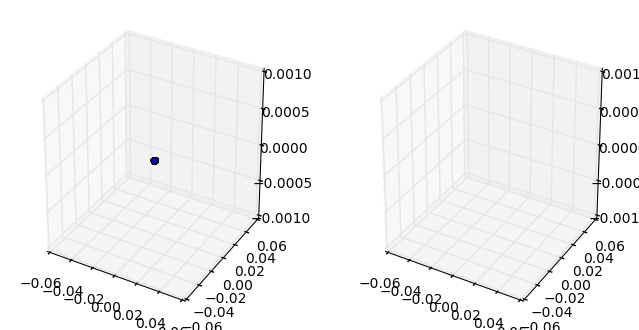

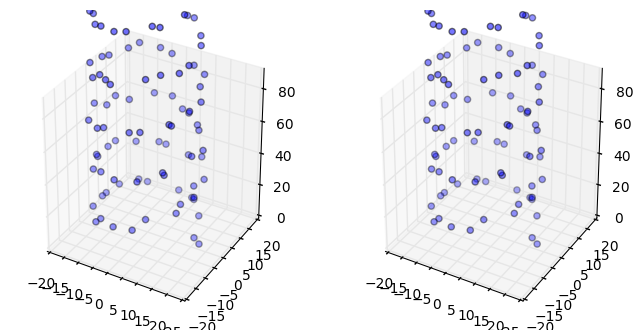

In [10]:
t0c = np.copy(t0)
t0r = t0c.reshape(1, 300)
pred_val = sess.run([pred], feed_dict={t: t0r})

# transpose to grab all x vals, all y vals, all z vals instead of (x, y, z) tuples
pred_val = np.asarray(pred_val).transpose()
rx_p, ry_p, a_p = np.squeeze(pred_val[0]), np.squeeze(pred_val[1]), np.squeeze(pred_val[2])

double_plot(rx_p, ry_p, a_p)
fit_plot(x, y, z, rx_p, ry_p, a_p)

In [11]:
print(pred_coeffs.eval(feed_dict={t: t0r}))
print(cost.eval(feed_dict={t: t0r}))
##print(weights.eval())

[[ 0.  0.  0.]]
84.0101


### Training

In [12]:
t0 = time.time()
costs = []

for epoch in range(EPOCHS):
    _, cost_val = sess.run([train, cost], feed_dict={t: t0r})
    costs.append(cost_val)
    if epoch % 10 == 0:
        print("Epoch {}, Cost: {}".format(epoch, cost_val))
        
print("Elapsed time: {}".format(time.time() - t0))

Epoch 0, Cost: 84.01006317138672
Epoch 10, Cost: 0.024863099679350853
Epoch 20, Cost: 7.361884399870178e-06
Epoch 30, Cost: 2.2301189783746622e-09
Epoch 40, Cost: 4.850638554015907e-12
Epoch 50, Cost: 3.031649096259942e-13
Epoch 60, Cost: 3.031649096259942e-13
Epoch 70, Cost: 3.031649096259942e-13
Epoch 80, Cost: 3.031649096259942e-13
Epoch 90, Cost: 3.031649096259942e-13
Epoch 100, Cost: 3.031649096259942e-13
Epoch 110, Cost: 3.031649096259942e-13
Epoch 120, Cost: 3.031649096259942e-13
Epoch 130, Cost: 3.031649096259942e-13
Epoch 140, Cost: 3.031649096259942e-13
Epoch 150, Cost: 3.031649096259942e-13
Epoch 160, Cost: 3.031649096259942e-13
Epoch 170, Cost: 3.031649096259942e-13
Epoch 180, Cost: 3.031649096259942e-13
Epoch 190, Cost: 3.031649096259942e-13
Elapsed time: 0.12100696563720703


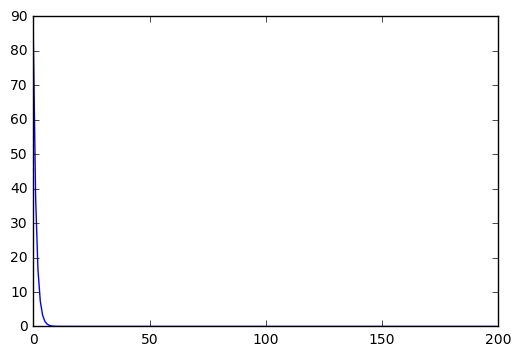

In [13]:
plt.plot(range(EPOCHS), costs)
plt.show()

### Final Accuracy

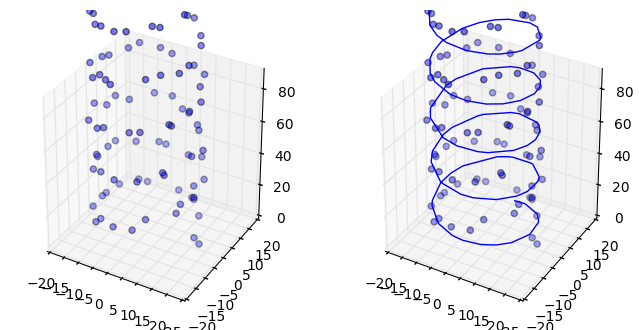

In [14]:
pred_val = sess.run([pred], feed_dict={t: t0r})

# transpose to grab all x vals, all y vals, all z vals instead of (x, y, z) tuples
pred_val = np.asarray(pred_val).transpose()
rx_p, ry_p, a_p = np.squeeze(pred_val[0]), np.squeeze(pred_val[1]), np.squeeze(pred_val[2])

fit_plot(x, y, z, rx_p, ry_p, a_p)